Created 4 December 2012. A reply to [Valentin Tombez's tweet of 1 December 2021 on vaccinated vs. unvaccinated Covid hospitalized patients](https://twitter.com/ValentinTombez/status/1466081552002162689). Data are [here](https://www.covid19.admin.ch/en/epidemiologic/hosp).  Documentation is [here](https://www.covid19.admin.ch/api/data/documentation). Code is [here](https://github.com/jean-luc-jucker/twitter_tombez_20211201).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Load data

In [2]:
raw = pd.read_csv(os.path.join('bag_covid_19_data_csv_03_décembre_2021/data', 'COVID19Hosp_vaccpersons_AKL10_w.csv'), dtype={'altersklasse_covid19': 'str'})
#vote.rename(columns={1: 'Canton', 3:'Commune', 12: 'Oui'}, inplace=True)
#keep = ['Canton', 'Commune', 'Oui']
#vote=vote[keep]
raw.info()
raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  1936 non-null   int64  
 1   altersklasse_covid19  1936 non-null   object 
 2   vaccination_status    1936 non-null   object 
 3   entries               1936 non-null   int64  
 4   sumTotal              1936 non-null   int64  
 5   pop                   1320 non-null   float64
 6   inz_entries           1320 non-null   float64
 7   inzsumTotal           0 non-null      float64
 8   geoRegion             1936 non-null   object 
 9   type                  1936 non-null   object 
 10  type_variant          1936 non-null   object 
 11  vaccine               1936 non-null   object 
 12  data_completeness     1936 non-null   object 
 13  version               1936 non-null   object 
 14  timeframe_all         1936 non-null   bool   
dtypes: bool(1), float64(3

,date,altersklasse_covid19,vaccination_status,entries,sumTotal,pop,inz_entries,inzsumTotal,geoRegion,type,type_variant,vaccine,data_completeness,version,timeframe_all
0,202104,0 - 9,fully_vaccinated,0,0,5.0,0.00,NaN,CHFL,COVID19Hosp,vaccine,all,limited,2021-12-03_07-52-50,True
1,202104,0 - 9,partially_vaccinated,0,0,14.0,0.00,NaN,CHFL,COVID19Hosp,vaccine,all,limited,2021-12-03_07-52-50,True
2,202104,0 - 9,not_vaccinated,6,6,880568.0,0.68,NaN,CHFL,COVID19Hosp,vaccine,all,limited,2021-12-03_07-52-50,True
3,202104,0 - 9,unknown,2,2,NaN,NaN,NaN,CHFL,COVID19Hosp,vaccine,all,limited,2021-12-03_07-52-50,True
4,202104,10 - 19,fully_vaccinated,0,0,50.0,0.00,NaN,CHFL,COVID19Hosp,vaccine,all,limited,2021-12-03_07-52-50,True


### Subset data

In [3]:
data = raw.loc[(raw['date'] > 202143) &
               (raw['date'] < 202148) &
               (raw['vaccination_status'] != 'unknown') &
               (raw['altersklasse_covid19'] != 'Unbekannt') &
               (raw['altersklasse_covid19'] != 'all')
               , :]
print(data.shape)
data.head()

(108, 15)


,date,altersklasse_covid19,vaccination_status,entries,sumTotal,pop,inz_entries,inzsumTotal,geoRegion,type,type_variant,vaccine,data_completeness,version,timeframe_all
1600,202144,0 - 9,fully_vaccinated,0,0,153.0,0.00,NaN,CHFL,COVID19Hosp,vaccine,all,intermediate,2021-12-03_07-52-50,True
1601,202144,0 - 9,partially_vaccinated,0,0,59.0,0.00,NaN,CHFL,COVID19Hosp,vaccine,all,intermediate,2021-12-03_07-52-50,True
1602,202144,0 - 9,not_vaccinated,2,178,880375.0,0.23,NaN,CHFL,COVID19Hosp,vaccine,all,intermediate,2021-12-03_07-52-50,True
1604,202144,10 - 19,fully_vaccinated,0,6,329462.0,0.00,NaN,CHFL,COVID19Hosp,vaccine,all,intermediate,2021-12-03_07-52-50,True
1605,202144,10 - 19,partially_vaccinated,0,1,27863.0,0.00,NaN,CHFL,COVID19Hosp,vaccine,all,intermediate,2021-12-03_07-52-50,True


In [4]:
table = data.groupby(['altersklasse_covid19', 'vaccination_status']).sum().reset_index()


def relabel(x):
    if x == 'fully_vaccinated':
        label = 'Entièrement vaccinés'
    elif x == 'partially_vaccinated':
        label = 'Partiellement vaccinés'        
    elif x == 'not_vaccinated':
        label = 'Non vaccinés'     
    return label
table['vaccination_status'] = table['vaccination_status'].apply(relabel)
table

,altersklasse_covid19,vaccination_status,date,entries,sumTotal,pop,inz_entries,inzsumTotal,timeframe_all
0,0 - 9,Entièrement vaccinés,808582,0,0,623.0,0.00,0.0,4
1,0 - 9,Non vaccinés,808582,16,741,3521484.0,1.82,0.0,4
2,0 - 9,Partiellement vaccinés,808582,0,0,241.0,0.00,0.0,4
3,10 - 19,Entièrement vaccinés,808582,1,27,1357517.0,0.30,0.0,4
4,10 - 19,Non vaccinés,808582,10,249,1949456.0,2.05,0.0,4
5,10 - 19,Partiellement vaccinés,808582,0,4,106527.0,0.00,0.0,4
6,20 - 29,Entièrement vaccinés,808582,2,73,2736378.0,0.30,0.0,4
7,20 - 29,Non vaccinés,808582,25,968,1324280.0,7.56,0.0,4
8,20 - 29,Partiellement vaccinés,808582,0,12,109810.0,0.00,0.0,4
9,30 - 39,Entièrement vaccinés,808582,8,67,3397395.0,0.94,0.0,4


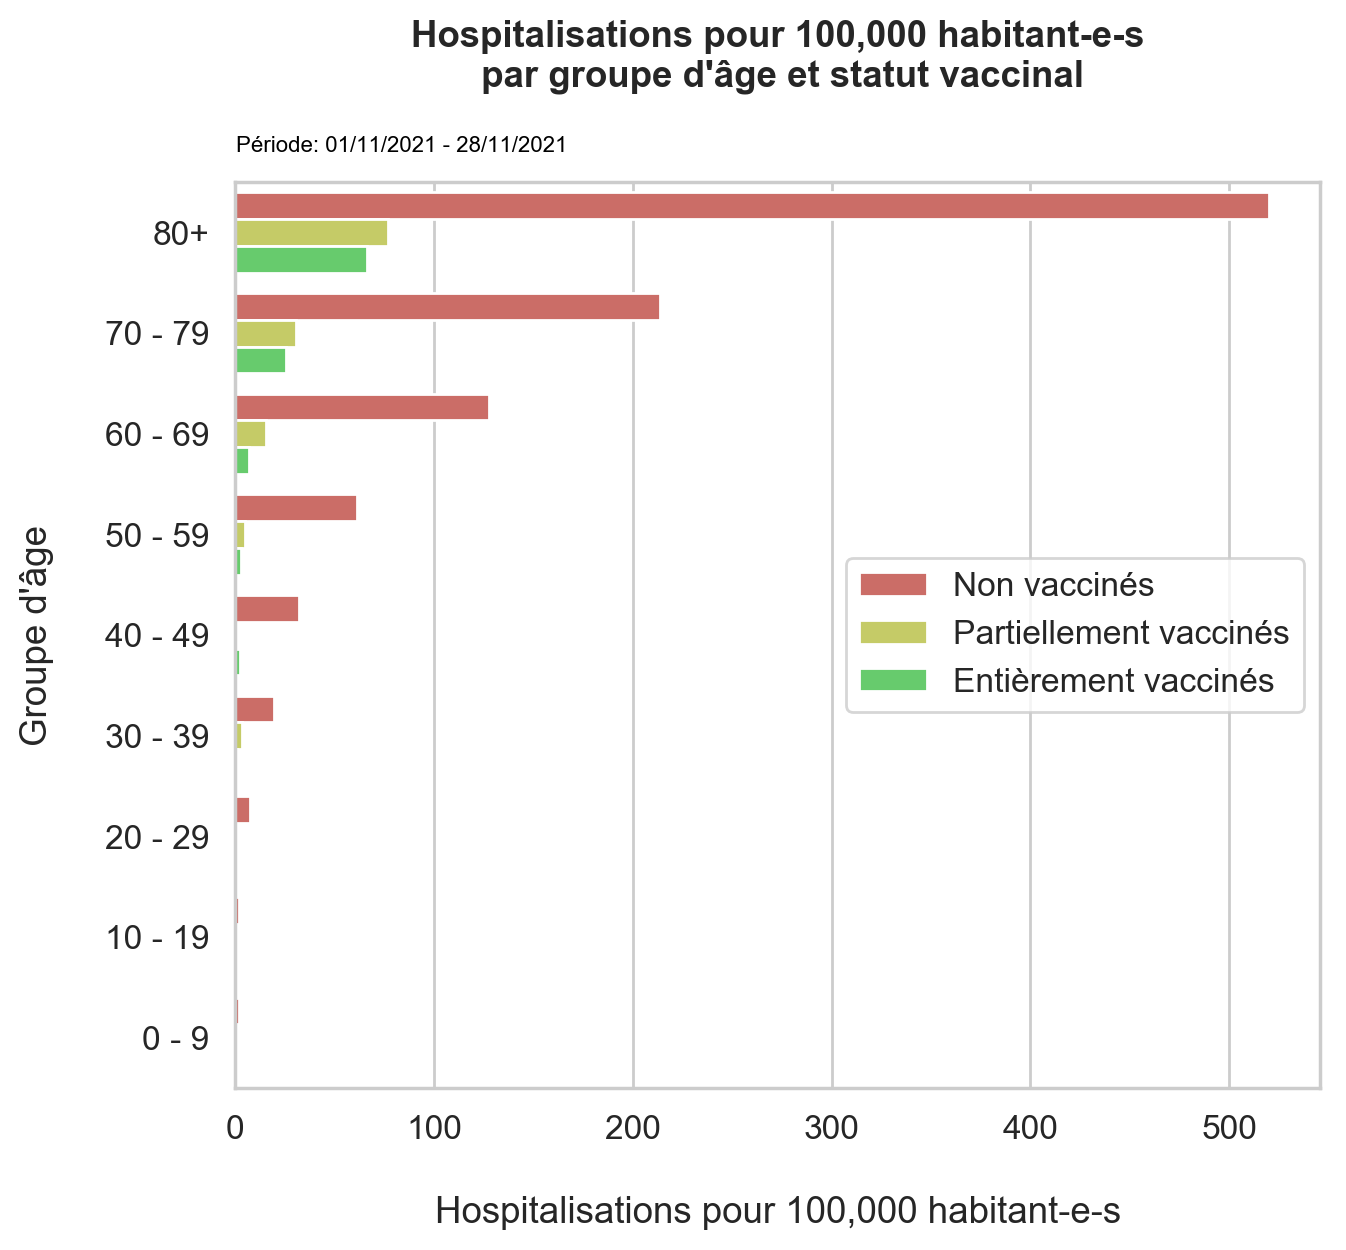

In [5]:
sns.set(rc={"figure.dpi":200, 'figure.figsize':(7,6)}, style='whitegrid', palette='hls', font_scale=1.1)


ax=sns.barplot(data=table.sort_values(by='inz_entries', ascending=False), x='inz_entries', y='altersklasse_covid19', hue='vaccination_status')
plt.text(0+0.2, -0.8, "Période: 01/11/2021 - 28/11/2021", horizontalalignment='left', size=8, color='black')
plt.title('Hospitalisations pour 100,000 habitant-e-s\n par groupe d\'âge et statut vaccinal\n\n', fontweight='bold')
plt.ylabel('Groupe d\'âge\n')
plt.xlabel('\nHospitalisations pour 100,000 habitant-e-s')

plt.legend(loc='center right')
plt.show()